# Gradient Boosting Method

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier  #GBM 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [12]:
hr = pd.read_csv("data/processed_data.csv")
#hr.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
hr = hr.drop(["Unnamed: 0"], axis=1)
target = "Attrition_Yes"
hr.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,OverTime_No,OverTime_Yes,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,1,94,5993,19479,8,11,8,...,1,0,0,0,0,1,1,0,0,0
1,49,279,8,2,61,5130,24907,1,23,10,...,0,0,0,1,1,0,0,0,1,0
2,37,1373,2,4,92,2090,2396,6,15,7,...,0,1,0,0,0,1,0,0,1,0
3,33,1392,3,5,56,2909,23159,1,11,8,...,0,0,1,0,0,1,0,0,1,0
4,27,591,2,7,40,3468,16632,9,12,6,...,0,0,0,1,1,0,0,0,1,0


In [13]:
# split train test
temp = pd.concat([hr.iloc[:,:14], hr.iloc[:,16:]], 1)

X_train, X_test, y_train, y_test = train_test_split(temp, hr.iloc[:,15], test_size=0.3, random_state=12)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 78)
(441, 78)
(1029,)
(441,)


Accuracy of the GBM on test set: 0.859
             precision    recall  f1-score   support

          0       0.88      0.96      0.92       370
          1       0.62      0.34      0.44        71

avg / total       0.84      0.86      0.84       441



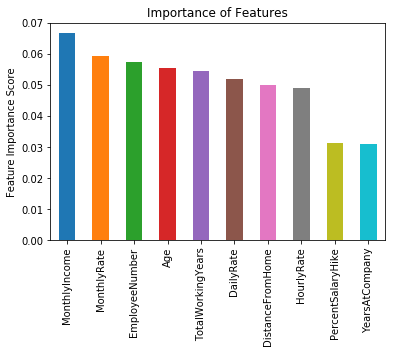

In [14]:
# GBM base model
# Base parameter setting
# n_estimators: The number of boosting stages to perform. 
base_args = {'max_depth': 3, 'n_estimators': 500, 'subsample': 1, 'random_state': 2,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}

base_model = GradientBoostingClassifier(learning_rate=0.1,**base_args)
base_model.fit(X_train,y_train)
predictors=list(X_train)

# Feature importance Top 10
feat_imp = pd.Series(base_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:10].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

# Accuracy
print('Accuracy of the GBM on test set: {:.3f}'.format(base_model.score(X_test, y_test)))
pred=base_model.predict(X_test)
print(classification_report(y_test, pred))

In [15]:
# Tunning Hyperparameters - Learning rate and estimators
p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(**base_args), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.85811, std: 0.01356, params: {'learning_rate': 0.15, 'n_estimators': 100},
  mean: 0.86300, std: 0.01730, params: {'learning_rate': 0.15, 'n_estimators': 250},
  mean: 0.86398, std: 0.01710, params: {'learning_rate': 0.15, 'n_estimators': 500},
  mean: 0.86981, std: 0.01583, params: {'learning_rate': 0.15, 'n_estimators': 750},
  mean: 0.86882, std: 0.01639, params: {'learning_rate': 0.15, 'n_estimators': 1000},
  mean: 0.86785, std: 0.01500, params: {'learning_rate': 0.15, 'n_estimators': 1250},
  mean: 0.86785, std: 0.01500, params: {'learning_rate': 0.15, 'n_estimators': 1500},
  mean: 0.86785, std: 0.01500, params: {'learning_rate': 0.15, 'n_estimators': 1750},
  mean: 0.85812, std: 0.00819, params: {'learning_rate': 0.1, 'n_estimators': 100},
  mean: 0.86494, std: 0.01620, params: {'learning_rate': 0.1, 'n_estimators': 250},
  mean: 0.86688, std: 0.01446, params: {'learning_rate': 0.1, 'n_estimators': 500},
  mean: 0.87076, std: 0.01657, params: {'learning_rate': 0.1, 'n

In [16]:
# Model evaluation
pred=tuning.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92       370
          1       0.62      0.37      0.46        71

avg / total       0.84      0.86      0.85       441



Accuracy of the GBM on test set: 0.862
             precision    recall  f1-score   support

          0       0.89      0.96      0.92       370
          1       0.62      0.37      0.46        71

avg / total       0.84      0.86      0.85       441



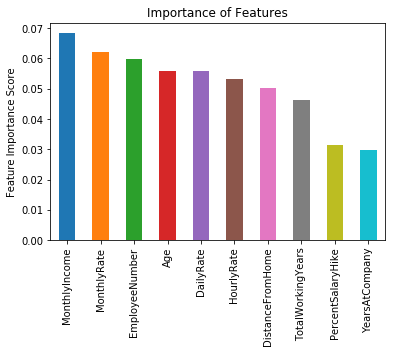

In [17]:
# Model Evaluation
base_args = {'max_depth': 3, 'subsample': 1, 'random_state': 2,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
model1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1500, **base_args)
model1.fit(X_train,y_train)
predictors=list(X_train)

# Feature Importance
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:10].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

# Accuracy
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

In [19]:
# Tuning parameters - min sample splits, min sample leaf
base_args = {'learning_rate': 0.1, 'n_estimators': 1500, 'max_depth': 3, 'subsample': 1, 'random_state': 2,
            'max_features':'sqrt'}
p_test = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(**base_args), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.87271, std: 0.01526, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.86688, std: 0.01340, params: {'min_samples_leaf': 1, 'min_samples_split': 4},
  mean: 0.86686, std: 0.01250, params: {'min_samples_leaf': 1, 'min_samples_split': 6},
  mean: 0.86785, std: 0.01654, params: {'min_samples_leaf': 1, 'min_samples_split': 8},
  mean: 0.86688, std: 0.01818, params: {'min_samples_leaf': 1, 'min_samples_split': 10},
  mean: 0.86978, std: 0.00831, params: {'min_samples_leaf': 1, 'min_samples_split': 20},
  mean: 0.86688, std: 0.01341, params: {'min_samples_leaf': 1, 'min_samples_split': 40},
  mean: 0.86688, std: 0.01371, params: {'min_samples_leaf': 1, 'min_samples_split': 60},
  mean: 0.86884, std: 0.01440, params: {'min_samples_leaf': 1, 'min_samples_split': 100},
  mean: 0.86981, std: 0.01392, params: {'min_samples_leaf': 3, 'min_samples_split': 2},
  mean: 0.86981, std: 0.01392, params: {'min_samples_leaf': 3, 'min_samples_split': 4},
  mean: 0.86981, std: 0.01

Accuracy of the GBM on test set: 0.864
             precision    recall  f1-score   support

          0       0.89      0.96      0.92       370
          1       0.64      0.35      0.45        71

avg / total       0.85      0.86      0.85       441



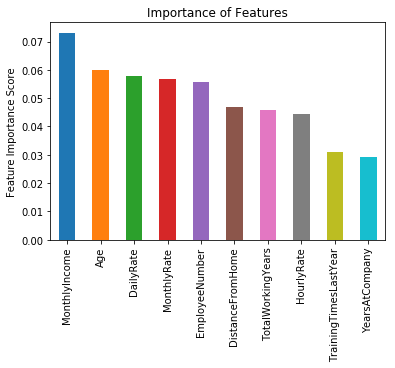

In [21]:
# Model Evaluation
base_args = {'learning_rate': 0.05, 'n_estimators': 750, 'max_depth': 3, 'subsample': 1, 'random_state': 2,
            'max_features':'sqrt'}
model2 = GradientBoostingClassifier(min_samples_leaf=1, min_samples_split=2, **base_args)
model2.fit(X_train,y_train)
predictors=list(X_train)

# Feature Importance
feat_imp = pd.Series(model2.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:10].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

# Accuracy
print('Accuracy of the GBM on test set: {:.3f}'.format(model2.score(X_test, y_test)))
pred=model2.predict(X_test)
print(classification_report(y_test, pred))

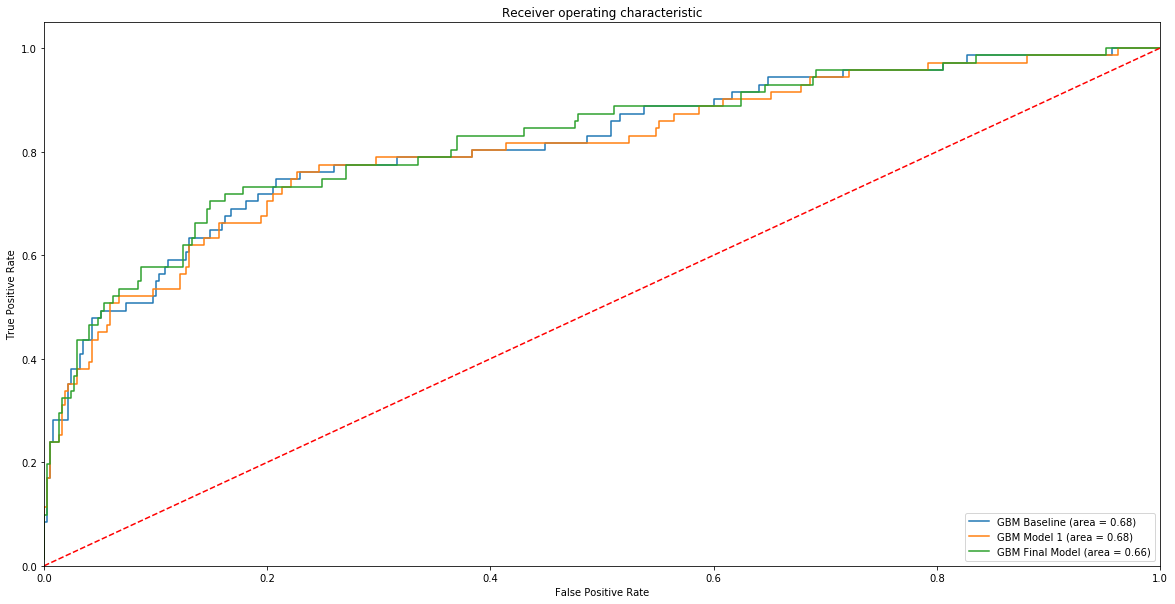

In [23]:
# Comparison of ROC AUC
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

# base
base_model_args = {'max_depth': 3, 'n_estimators': 500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
base_model = GradientBoostingClassifier(learning_rate=0.1, **base_model_args)
base_model.fit(X_train,y_train)

# learning rate, estimators
model1_args = {'learning_rate':0.1,'max_depth': 3, 'n_estimators': 1500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
model1 = GradientBoostingClassifier(**model1_args)
model1.fit(X_train,y_train)

# sample split, leaf
model2_args = {'learning_rate':0.1,'max_depth': 3, 'n_estimators': 1500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
model2=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)
model2.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
base_roc_auc = roc_auc_score(y_test, base_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, base_model.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 
model2_roc_auc = roc_auc_score(y_test, model2.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, model2.predict_proba(X_test)[:,1])

plt.figure(figsize=(20,10))
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % base_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % model2_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()